In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tfumap.paths import FIGURE_DIR, save_fig

In [4]:
from tfumap.paths import MODEL_DIR, ensure_dir
from tfumap.semisupervised_keras import pretrained_networks

In [5]:
datasets = ["mnist", "fmnist", "cifar10", "cassins", "macosko2015"]
aug_types = [
    "not_augmented",
    "augmented",
    "umap_euclidean",
    "umap_learned",
    "umap_augmented_learned",
    "umap_euclidean_augmented",
]
dset_sizes = [4, 16, 64, 256, 1024, "full"]

In [6]:
results_loc = MODEL_DIR / 'semisupervised-keras' 

In [7]:
results_df = pd.DataFrame(
    columns=[
        "dataset",
        "labels_per_class",
        "augmented",
        "timestamp",
        "location",
        "test_acc",
        "test_sem",
        "dset_size_title",
    ]
)
for dataset in datasets:

    for aug_type in aug_types:
        for dset_size in dset_sizes:
            try:
                dset_timestamp = pretrained_networks[dataset][aug_type][dset_size]
                dset_loc = results_loc / dataset / str(dset_size) / dset_timestamp
                loc_list = list(dset_loc.glob("test_loss_SEM.npy"))

                if len(loc_list) == 0:
                    print(aug_type, dset_size, dataset, dset_loc)
                    continue
                test_acc, test_sem = np.load(loc_list[0])
                dset_size_title = str(dset_size)
                dset_size = str(dset_size) if dset_size is not "full" else 4096
                results_df.loc[len(results_df)] = [
                    dataset,
                    dset_size,
                    aug_type,
                    dset_timestamp,
                    dset_loc,
                    test_acc,
                    test_sem,
                    dset_size_title,
                ]
            except:
                continue
results_df

,dataset,labels_per_class,augmented,timestamp,location,test_acc,test_sem,dset_size_title
0,mnist,4,not_augmented,mnist_4____2020_08_23_13_59_31_357892_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.814300,0.003889,4
1,mnist,16,not_augmented,mnist_16____2020_08_23_14_13_03_306576_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.954800,0.002077,16
2,mnist,64,not_augmented,mnist_64____2020_08_23_14_13_19_397319_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.978700,0.001444,64
3,mnist,256,not_augmented,mnist_256____2020_08_23_14_12_28_828611_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.989600,0.001014,256
4,mnist,1024,not_augmented,mnist_1024____2020_08_23_14_12_00_839816_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.994100,0.000766,1024
...,...,...,...,...,...,...,...,...
127,macosko2015,16,umap_euclidean,macosko2015_0.0_16____2020_11_11_20_07_36_3835...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.970542,0.002526,16
128,macosko2015,64,umap_euclidean,macosko2015_0.0_64____2020_11_11_20_12_03_0407...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.972774,0.002431,64
129,macosko2015,256,umap_euclidean,macosko2015_0.0_256____2020_11_11_20_13_05_560...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.973443,0.002402,256
130,macosko2015,1024,umap_euclidean,macosko2015_0.0_1024____2020_11_11_20_13_34_65...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.976568,0.002260,1024


In [8]:
from IPython.display import display

In [59]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(results_df)

,dataset,labels_per_class,augmented,timestamp,location,test_acc,test_sem,dset_size_title
0,mnist,4,not_augmented,mnist_4____2020_08_23_13_59_31_357892_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.814300,0.003889,4
1,mnist,16,not_augmented,mnist_16____2020_08_23_14_13_03_306576_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.954800,0.002077,16
2,mnist,64,not_augmented,mnist_64____2020_08_23_14_13_19_397319_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.978700,0.001444,64
3,mnist,256,not_augmented,mnist_256____2020_08_23_14_12_28_828611_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.989600,0.001014,256
4,mnist,1024,not_augmented,mnist_1024____2020_08_23_14_12_00_839816_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.994100,0.000766,1024
5,mnist,4096,not_augmented,mnist_full____2020_08_23_14_02_35_917340_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.996500,0.000591,full
6,mnist,4,augmented,mnist_4____2020_08_26_22_34_26_172040_baseline...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.928000,0.002585,4
7,mnist,16,augmented,mnist_16____2020_08_26_22_36_42_823740_baselin...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.971500,0.001664,16
8,mnist,64,augmented,mnist_64____2020_08_26_22_37_03_013806_baselin...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.986000,0.001175,64
9,mnist,256,augmented,mnist_256____2020_08_26_22_38_00_695064_baseli...,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.990500,0.000970,256


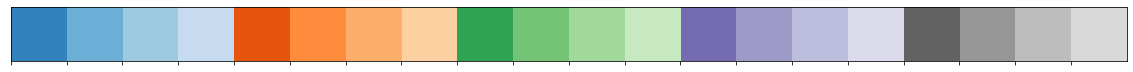

In [60]:
pal = sns.color_palette('tab20c',20)
sns.palplot(pal)

### plot naive

In [74]:
color_list = [
    {
        "mask": results_df.augmented == "not_augmented",
        "color": pal[16],
        "ls": "solid",
        "marker": "o",
        "label": "Baseline",
    },
    {
        "mask": results_df.augmented == "umap_euclidean",
        "color": pal[0],
        "ls": "solid",
        "marker": "o",
        "label": "+ UMAP (Euclidean)",
    },
]

In [75]:
alpha = 0.75
linewidth = 2

In [76]:
subset_ds

,dataset,labels_per_class,augmented,timestamp,location,test_acc,test_sem,dset_size_title


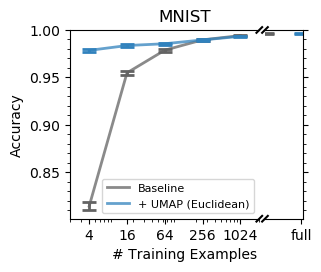

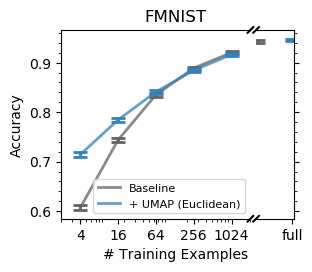

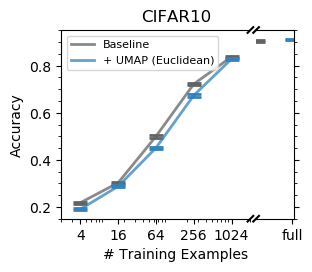

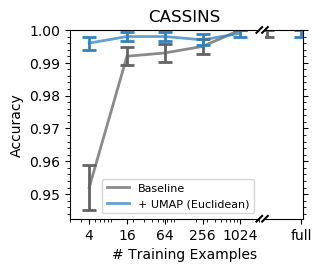

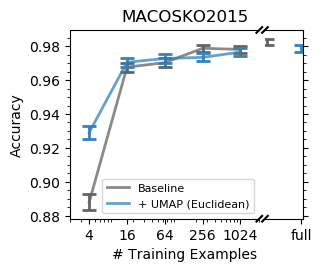

In [77]:
for dataset in datasets:
    fig, (ax, ax2) = plt.subplots(
        1,
        2,
        figsize=(3, 2.5),
        dpi=100,
        sharey=True,
        gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
    )

    for li, col_dict in enumerate(color_list):
        mask = col_dict["mask"] & (results_df.dataset == dataset)
        color = col_dict["color"]
        ls = col_dict["ls"]
        label = col_dict["label"]
        marker = col_dict["marker"]

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        sem = subset_ds.test_sem.values
        # ax.scatter(
        #    nex, acc, color=color, s=50, alpha=1, marker=marker
        # )  # , facecolors="none")
        # ax.fill_between(nex, acc - sem, acc+sem, color=color, alpha = 0.5)
        # ax.errorbar(nex, acc, yerr=sem,  color=color, fmt='', marker='o')
        ax.errorbar(
            nex,
            acc,
            yerr=sem,
            elinewidth=2,
            capsize=5,
            color=color,
            markeredgewidth=2,
            fmt="none",
            marker="",
        )
        ax.plot(
            nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls
        )  # , label = label

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
        # display(subset_ds)
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        sem = subset_ds.test_sem.values
        nex = (
            nex + li / 100 - len(color_list) / 2 / 100
        )  # +(np.random.rand(1)-0.5)*.025
        #ax2.scatter(
        #    nex, acc, color=color, s=50, alpha=1, marker=marker
        #)  # , facecolors="none")
        ax2.errorbar(
            nex,
            acc,
            yerr=sem,
            elinewidth=2,
            capsize=5,
            color=color,
            markeredgewidth=2,
            fmt="none",
            marker="",
        )
        ax.plot(
            [],
            [],
            #"-" + marker,
            color=color,
            linewidth=linewidth,
            label=label,
            alpha=alpha,
            # markersize=7,
            # markerfacecolor="none",
            ls=ls,
        )

    ax.set_xscale("log")
    ax.set_xticks([4, 16, 64, 256, 1024])
    ax.set_xticklabels([4, 16, 64, 256, 1024])
    # ax.set_ylim([0, 1])
    ax.spines["right"].set_visible(False)
    ax.legend(fontsize=8)
    ax.set_xlim([2, 2048])

    # ax2.set_xscale('log')
    ax2.set_xticks([4096])
    ax2.set_xticklabels(["full"])
    ax2.spines["left"].set_visible(False)
    ax2.yaxis.tick_right()

    d = 0.015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    d = 0.015
    offset = 5
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
    ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

    ax.minorticks_on()
    ax.tick_params(axis="y", which="minor", direction="out")

    ymin, ymax = ax.get_ylim()
    if ymax > 1:
        ymax = 1
    ax.set_ylim([ymin, ymax])

    ax.set_title(dataset.upper(), x=0.605)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("# Training Examples", x=0.605)
    ensure_dir(FIGURE_DIR / "ssl_results")
    save_fig(FIGURE_DIR / 'ssl_results' /(dataset + '_umap_euclidean_sem'), save_pdf = True)

    plt.show()
    #break

### plot consistency-euclidean

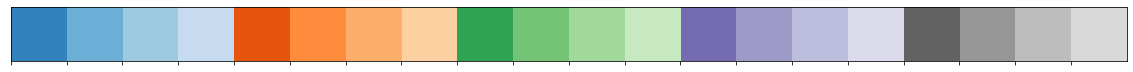

In [79]:
sns.palplot(pal)

In [81]:
color_list = [
    {
        "mask": results_df.augmented == 'not_augmented',
        "color": pal[16],
        "ls": 'solid',
        "marker": 'o',
        "label": "Baseline"
    },
    {
        "mask": results_df.augmented == 'augmented',
        "color": pal[17],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug."
    },
    
    {
        "mask": results_df.augmented == 'umap_euclidean_augmented',
        "color": pal[0],
        "ls": 'dashed',
        "marker": 'X',
        "label": "+ Aug. + UMAP (Euclidean)"
    },
    

    
]


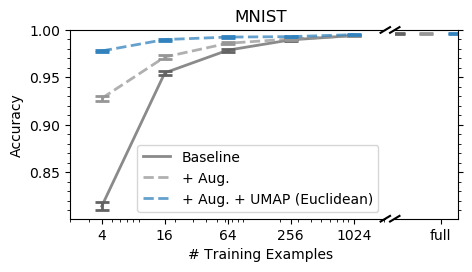

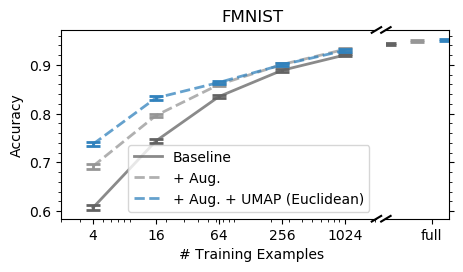

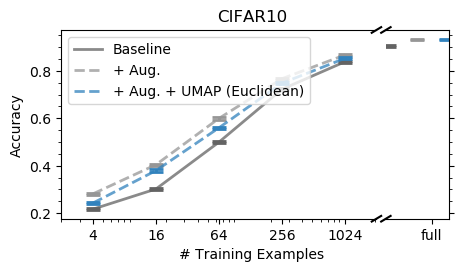

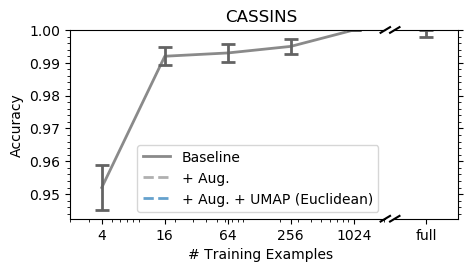

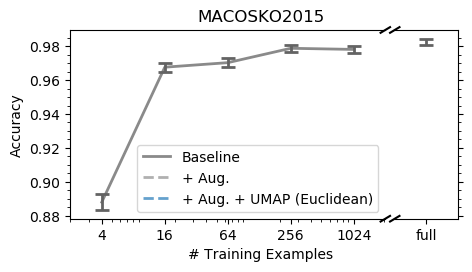

In [83]:
for dataset in datasets:
    fig, (ax, ax2) = plt.subplots(
        1,
        2,
        figsize=(5, 2.5),
        dpi=100,
        sharey=True,
        gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
    )

    for li, col_dict in enumerate(color_list):
        mask = col_dict["mask"] & (results_df.dataset == dataset)
        color = col_dict["color"]
        ls = col_dict["ls"]
        label = col_dict["label"]
        marker = col_dict["marker"]

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        sem = subset_ds.test_sem.values
        # ax.scatter(
        #    nex, acc, color=color, s=50, alpha=1, marker=marker
        # )  # , facecolors="none")
        # ax.fill_between(nex, acc - sem, acc+sem, color=color, alpha = 0.5)
        # ax.errorbar(nex, acc, yerr=sem,  color=color, fmt='', marker='o')
        ax.errorbar(
            nex,
            acc,
            yerr=sem,
            elinewidth=2,
            capsize=5,
            color=color,
            markeredgewidth=2,
            fmt="none",
            marker="",
        )
        ax.plot(
            nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls
        )  # , label = label

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
        # display(subset_ds)
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        sem = subset_ds.test_sem.values
        nex = (
            nex + li / 100 - len(color_list) / 2 / 100
        )  # +(np.random.rand(1)-0.5)*.025
        #ax2.scatter(
        #    nex, acc, color=color, s=50, alpha=1, marker=marker
        #)  # , facecolors="none")

        ax2.errorbar(
            nex,
            acc,
            yerr=sem,
            elinewidth=2,
            capsize=5,
            color=color,
            markeredgewidth=2,
            fmt="none",
            marker="",
        )
        ax.plot(
            [],
            [],
            #"-" + marker,
            color=color,
            linewidth=linewidth,
            label=label,
            alpha=alpha,
            # markersize=7,
            # markerfacecolor="none",
            ls=ls,
        )

    ax.set_xscale("log")
    ax.set_xticks([4, 16, 64, 256, 1024])
    ax.set_xticklabels([4, 16, 64, 256, 1024])
    # ax.set_ylim([0, 1])
    ax.spines["right"].set_visible(False)
    ax.legend()
    ax.set_xlim([2, 2048])

    # ax2.set_xscale('log')
    ax2.set_xticks([4096])
    ax2.set_xticklabels(["full"])
    ax2.spines["left"].set_visible(False)
    ax2.yaxis.tick_right()

    d = 0.015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    d = 0.015
    offset = 5
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
    ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

    ax.minorticks_on()
    ax.tick_params(axis="y", which="minor", direction="out")
        
    ymin, ymax = ax.get_ylim()
    if ymax > 1:
        ymax = 1
    ax.set_ylim([ymin, ymax])

    ax.set_title(dataset.upper(), x=0.605)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("# Training Examples", x=0.605)
    ensure_dir(FIGURE_DIR / "ssl_results")
    save_fig(FIGURE_DIR / 'ssl_results' /(dataset + '_umap_euclidean_consistency_sem'), save_pdf = True)

    plt.show()

### plot learned metric

In [84]:
color_list = [
    {
        "mask": results_df.augmented == "not_augmented",
        "color": pal[16],
        "ls": "solid",
        "marker": "o",
        "label": "Baseline",
    },
    {
        "mask": results_df.augmented == "augmented",
        "color": pal[17],
        "ls": "dashed",
        "marker": "X",
        "label": "+ Aug.",
    },
    {
        "mask": results_df.augmented == "umap_learned",
        "color": pal[4],
        "ls": "solid",
        "marker": "o",
        "label": "+ UMAP (learned)",
    },
    {
        "mask": results_df.augmented == "umap_augmented_learned",
        "color": pal[5],
        "ls": "dashed",
        "marker": "X",
        "label": "+Aug + UMAP (learned)",
    },
]


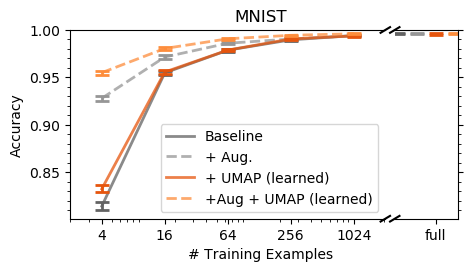

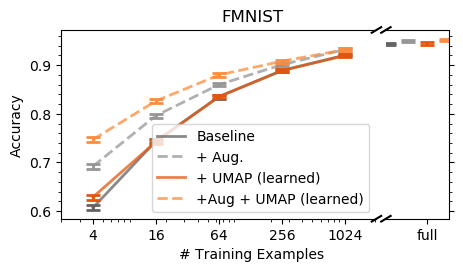

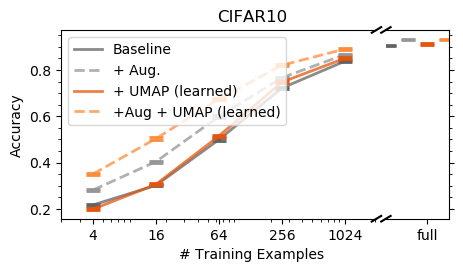

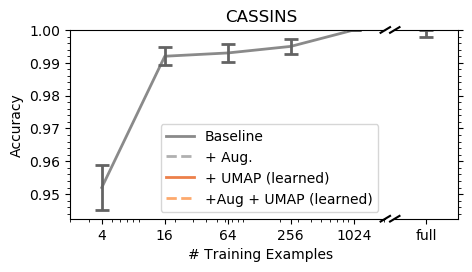

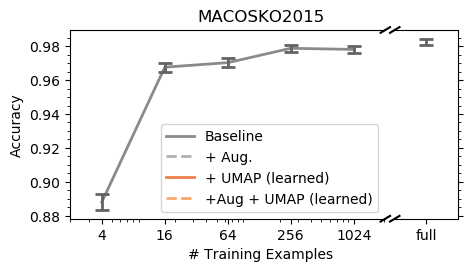

In [120]:
for dataset in datasets:
    fig, (ax, ax2) = plt.subplots(
        1,
        2,
        figsize=(5, 2.5),
        dpi=100,
        sharey=True,
        gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05},
    )

    for li, col_dict in enumerate(color_list):
        mask = col_dict["mask"] & (results_df.dataset == dataset)
        color = col_dict["color"]
        ls = col_dict["ls"]
        label = col_dict["label"]
        marker = col_dict["marker"]

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title != "full"]
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        sem = subset_ds.test_sem.values
        # ax.scatter(
        #    nex, acc, color=color, s=50, alpha=1, marker=marker
        # )  # , facecolors="none")
        # ax.fill_between(nex, acc - sem, acc+sem, color=color, alpha = 0.5)
        # ax.errorbar(nex, acc, yerr=sem,  color=color, fmt='', marker='o')
        ax.errorbar(
            nex,
            acc,
            yerr=sem,
            elinewidth=2,
            capsize=5,
            color=color,
            markeredgewidth=2,
            fmt="none",
            marker="",
        )
        ax.plot(
            nex, acc, linewidth=linewidth, alpha=alpha, color=color, ls=ls
        )  # , label = label

        subset_ds = results_df[mask]
        subset_ds = subset_ds[subset_ds.dset_size_title == "full"]
        # display(subset_ds)
        nex = subset_ds.labels_per_class.values.astype("int")
        acc = subset_ds.test_acc.values
        sem = subset_ds.test_sem.values
        nex = (
            nex + li / 100 - len(color_list) / 2 / 100
        )  # +(np.random.rand(1)-0.5)*.025
        #ax2.scatter(
        #    nex, acc, color=color, s=50, alpha=1, marker=marker
        #)  # , facecolors="none")
        ax2.errorbar(
            nex,
            acc,
            yerr=sem,
            elinewidth=2,
            capsize=5,
            color=color,
            markeredgewidth=2,
            fmt="none",
            marker="",
        )
        ax.plot(
            [],
            [],
            #"-" + marker,
            color=color,
            linewidth=linewidth,
            label=label,
            alpha=alpha,
            # markersize=7,
            # markerfacecolor="none",
            ls=ls,
        )

    ax.set_xscale("log")
    ax.set_xticks([4, 16, 64, 256, 1024])
    ax.set_xticklabels([4, 16, 64, 256, 1024])
    # ax.set_ylim([0, 1])
    ax.spines["right"].set_visible(False)
    ax.legend()
    ax.set_xlim([2, 2048])

    # ax2.set_xscale('log')
    ax2.set_xticks([4096])
    ax2.set_xticklabels(["full"])
    ax2.spines["left"].set_visible(False)
    ax2.yaxis.tick_right()

    d = 0.015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)
    ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

    d = 0.015
    offset = 5
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d * offset, +d * offset), (1 - d, 1 + d), **kwargs)
    ax2.plot((-d * offset, +d * offset), (-d, +d), **kwargs)

    ax.minorticks_on()
    ax.tick_params(axis="y", which="minor", direction="out")
        
    ymin, ymax = ax.get_ylim()
    if ymax > 1:
        ymax = 1
    ax.set_ylim([ymin, ymax])

    ax.set_title(dataset.upper(), x=0.605)
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("# Training Examples", x=0.605)
    ensure_dir(FIGURE_DIR / "ssl_results")
    save_fig(FIGURE_DIR / 'ssl_results' /(dataset + '_umap_learned_consistency_sem'), save_pdf = True)

    plt.show()

In [87]:
### create tables

In [88]:
results_df[:3]

,dataset,labels_per_class,augmented,timestamp,location,test_acc,test_sem,dset_size_title
0,mnist,4,not_augmented,mnist_4____2020_08_23_13_59_31_357892_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.8143,0.003889,4
1,mnist,16,not_augmented,mnist_16____2020_08_23_14_13_03_306576_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9548,0.002077,16
2,mnist,64,not_augmented,mnist_64____2020_08_23_14_13_19_397319_baseline,/mnt/cube/tsainbur/Projects/github_repos/umap_...,0.9787,0.001444,64


In [89]:
"""results_only = results_df[['dataset', 'labels_per_class', 'augmented', 'test_acc']]
r_only_cols = results_only.assign(key=results_only.groupby('augmented').cumcount()).pivot('key','augmented','test_acc')
r_only_addtl = results_only.assign(key=results_only.groupby('augmented').cumcount())[['dataset', 'labels_per_class', 'key']]
results_only = r_only_addtl.merge(r_only_cols, on = 'key').set_index(['dataset', 'labels_per_class']).drop_duplicates() 
results_only = results_only.drop(columns='key')
results_only"""

"results_only = results_df[['dataset', 'labels_per_class', 'augmented', 'test_acc']]\nr_only_cols = results_only.assign(key=results_only.groupby('augmented').cumcount()).pivot('key','augmented','test_acc')\nr_only_addtl = results_only.assign(key=results_only.groupby('augmented').cumcount())[['dataset', 'labels_per_class', 'key']]\nresults_only = r_only_addtl.merge(r_only_cols, on = 'key').set_index(['dataset', 'labels_per_class']).drop_duplicates() \nresults_only = results_only.drop(columns='key')\nresults_only"

In [93]:
results_only = results_df[['dataset', 'labels_per_class', 'augmented', 'test_acc']]
r_only_cols = results_only.assign(key=results_only.groupby('labels_per_class').cumcount()).pivot('key','labels_per_class','test_acc')
r_only_addtl = results_only.assign(key=results_only.groupby('labels_per_class').cumcount())[['dataset', 'augmented', 'key']]
results_only = r_only_addtl.merge(r_only_cols, on = 'key').set_index(['dataset', 'augmented']).drop_duplicates() 
results_only = results_only.drop(columns='key')
results_only = results_only[['4', '64', '256', '1024',4096]] 
results_only


4     64    256   1024   4096
dataset     augmented                                                  
mnist       not_augmented             0.814  0.979  0.990  0.994  0.996
            augmented                 0.928  0.986  0.990  0.994  0.996
            umap_euclidean            0.978  0.986  0.990  0.993  0.996
            umap_learned              0.832  0.979  0.990  0.994  0.996
            umap_augmented_learned    0.955  0.991  0.994  0.996  0.996
            umap_euclidean_augmented  0.978  0.992  0.993  0.995  0.997
fmnist      not_augmented             0.607  0.835  0.889  0.920  0.943
            augmented                 0.692  0.860  0.901  0.932  0.949
            umap_euclidean            0.714  0.841  0.885  0.916  0.947
            umap_learned              0.629  0.835  0.889  0.920  0.944
            umap_augmented_learned    0.747  0.880  0.908  0.932  0.952
            umap_euclidean_augmented  0.737  0.864  0.900  0.930  0.952
cifar10     not_augmented             0.217  0.499  0.722  0.838  0.905
            augmented                 0.281  0.599  0.766  0.867  0.933
            umap_euclidean            0.190  0.450  0.674  0.829  0.913
            umap_learned              0.199  0.515  0.748  0.850  0.912
            umap_augmented_learned    0.351  0.674  0.820  0.891  0.932
            umap_euclidean_augmented  0.243  0.560  0.748  0.852  0.932
cassins     not_augmented             0.952  0.993  0.995  1.000  0.999
            umap_euclidean            0.996  0.998  0.997  0.999  0.999
macosko2015 not_augmented             0.888  0.970  0.979  0.978  0.983
            umap_euclidean            0.929  0.973  0.973  0.977  0.979

In [104]:
[np.argmax(row.values) for idx, row in results_only.iterrows()]

[4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4]

In [ ]:
for each dataset:
    for each column:
        get the maximum value in that dataset/column
        replace with bold

In [119]:
print(
    results_only.round(3).to_latex(bold_rows=False)
    
    .replace("umap\_learned", "+ UMAP (learned)")
    .replace("umap\_augmented\_learned", "+Aug. + UMAP (learned)")
    .replace("umap\_euclidean\_augmented", "Aug. + UMAP (Euclidean)")
    .replace("4096", "full")
    .replace("not\_augmented", "Baseline")
    .replace("augmented", "+ Aug.")
    .replace("umap\_euclidean", "+ UMAP (Euclidean)")
    .replace("cifar10", "CIFAR10")
    .replace("mnist", "MNIST")
    .replace("fmnist", "FMNIST")
    .replace("macosko2015", "Retina")
    .replace("cassins", "Cassin's vireo")
)

\begin{tabular}{llrrrrr}
\toprule
            &                &      4 &     64 &    256 &   1024 &   full \\
dataset & + Aug. &        &        &        &        &        \\
\midrule
MNIST & Baseline &  0.814 &  0.979 &  0.990 &  0.994 &  0.996 \\
            & + Aug. &  0.928 &  0.986 &  0.990 &  0.994 &  0.996 \\
            & + UMAP (Euclidean) &  0.978 &  0.986 &  0.990 &  0.993 &  0.996 \\
            & + UMAP (learned) &  0.832 &  0.979 &  0.990 &  0.994 &  0.996 \\
            & +Aug. + UMAP (learned) &  0.955 &  0.991 &  0.994 &  0.996 &  0.996 \\
            & Aug. + UMAP (Euclidean) &  0.978 &  0.992 &  0.993 &  0.995 &  0.997 \\
fMNIST & Baseline &  0.607 &  0.835 &  0.889 &  0.920 &  0.943 \\
            & + Aug. &  0.692 &  0.860 &  0.901 &  0.932 &  0.949 \\
            & + UMAP (Euclidean) &  0.714 &  0.841 &  0.885 &  0.916 &  0.947 \\
            & + UMAP (learned) &  0.629 &  0.835 &  0.889 &  0.920 &  0.944 \\
            & +Aug. + UMAP (learned) &  0.747 &  0.880 